# Heart Disease Risk Prediction: Logistic Regression Homework

## Introductory Context

Heart disease is the world's leading cause of death, claiming approximately 18 million lives each year, as reported by the World Health Organization. Predictive models like logistic regression can enable early identification of at-risk patients by analyzing clinical features such as age, cholesterol, and blood pressure. This not only improves treatment outcomes but also optimizes resource allocation in healthcare settings.

In [15]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Libraries imported successfully")

Libraries imported successfully


## Step 1: Load and Prepare the Dataset

In [ ]:

df = pd.read_csv('Heart_Disease_Prediction.csv')

print("Dataset dimensions:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset dimensions: (270, 14)

First few rows:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:

print("Dataset information:")
print(df.info())
print("\n" + "="*50)
print("\nDescriptive statistics:")
df.describe()

Dataset information:
<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    str    
dtypes: float64(1), i

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:

print("Missing values per column:")
print(df.isnull().sum())
print("\n" + "="*50)
print("\nCheck for duplicates:", df.duplicated().sum())

Missing values per column:
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


Check for duplicates: 0


Target variable distribution:
Heart Disease
0    150
1    120
Name: count, dtype: int64

Proportion:
Heart Disease
0    0.555556
1    0.444444
Name: proportion, dtype: float64


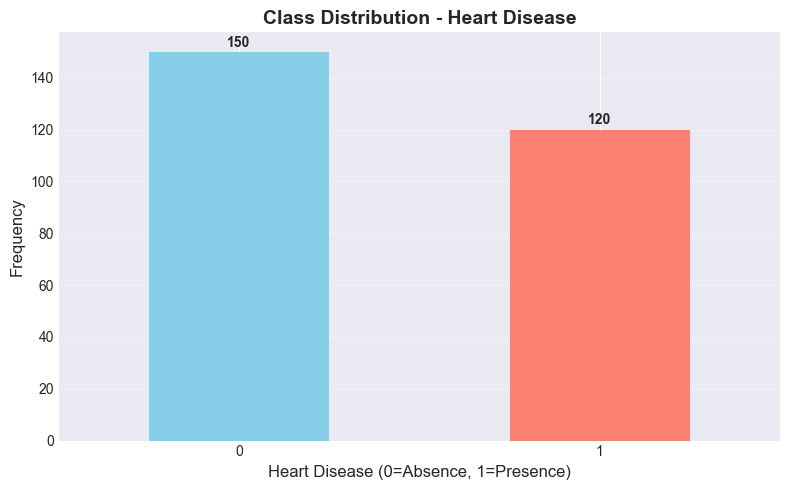

In [ ]:

df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})


print("Target variable distribution:")
print(df['Heart Disease'].value_counts())
print("\nProportion:")
print(df['Heart Disease'].value_counts(normalize=True))


plt.figure(figsize=(8, 5))
df['Heart Disease'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution - Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('Heart Disease (0=Absence, 1=Presence)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(df['Heart Disease'].value_counts().values):
    plt.text(i, v + 2, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

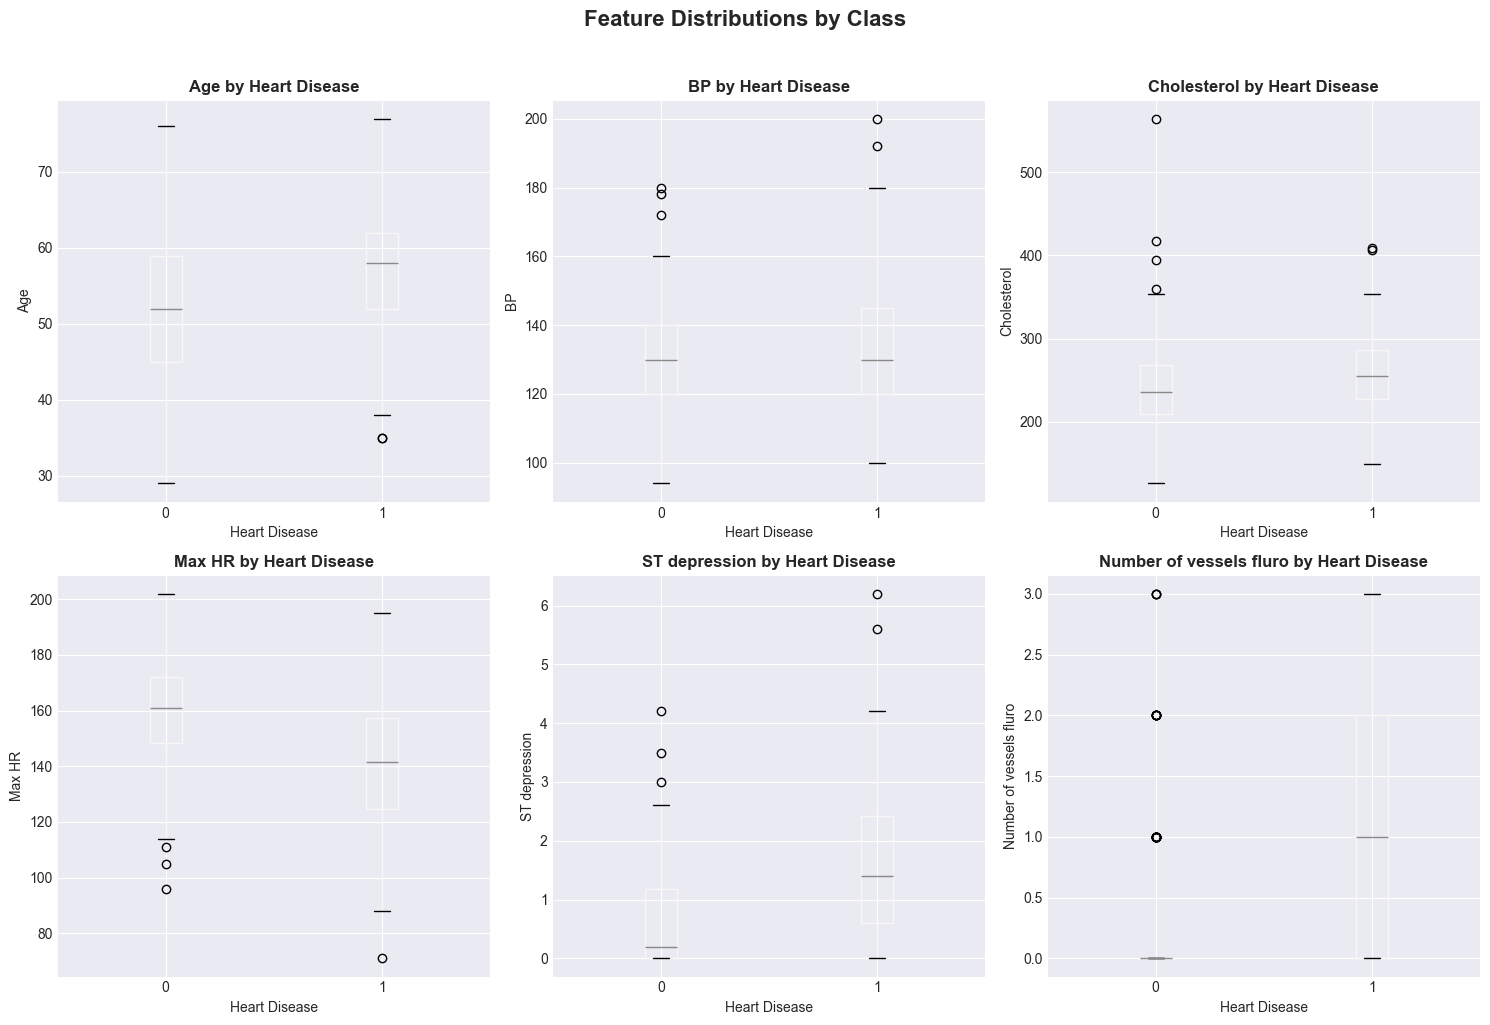

In [ ]:

features_to_plot = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features_to_plot):
    df.boxplot(column=feature, by='Heart Disease', ax=axes[i])
    axes[i].set_title(f'{feature} by Heart Disease', fontweight='bold')
    axes[i].set_xlabel('Heart Disease')
    axes[i].set_ylabel(feature)

plt.suptitle('Feature Distributions by Class', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

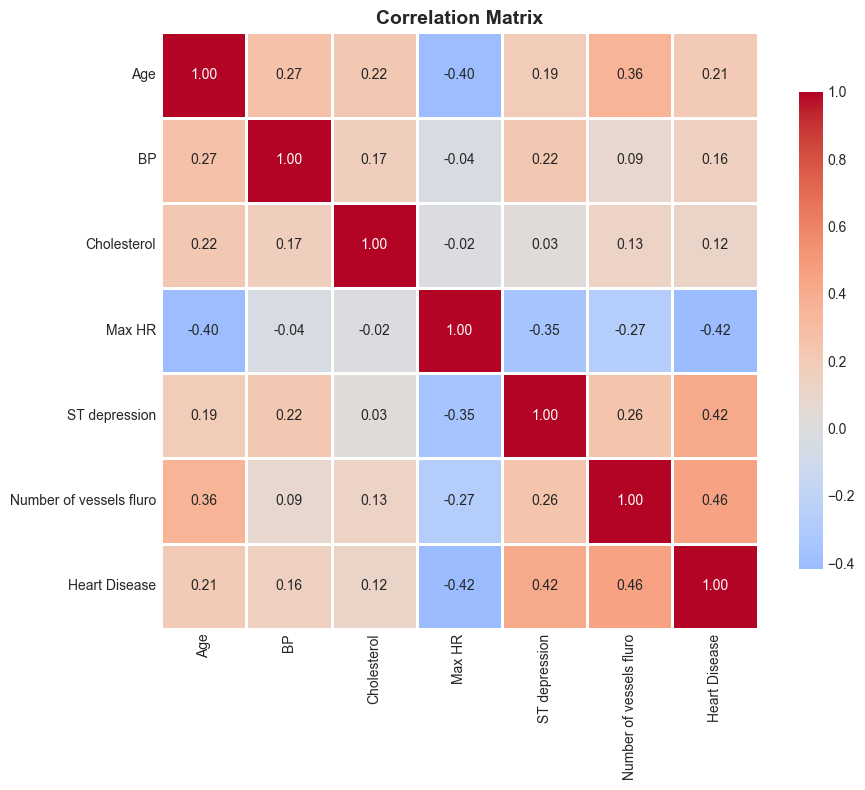

In [ ]:

numeric_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']
corr_matrix = df[numeric_features + ['Heart Disease']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:

selected_features = ['Age', 'Cholesterol', 'BP', 'Max HR', 'ST depression', 'Number of vessels fluro']

X = df[selected_features].values
y = df['Heart Disease'].values

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"\nSelected features: {selected_features}")

Shape of X: (270, 6)
Shape of y: (270,)

Selected features: ['Age', 'Cholesterol', 'BP', 'Max HR', 'ST depression', 'Number of vessels fluro']


## Step 2: Implement Basic Logistic Regression

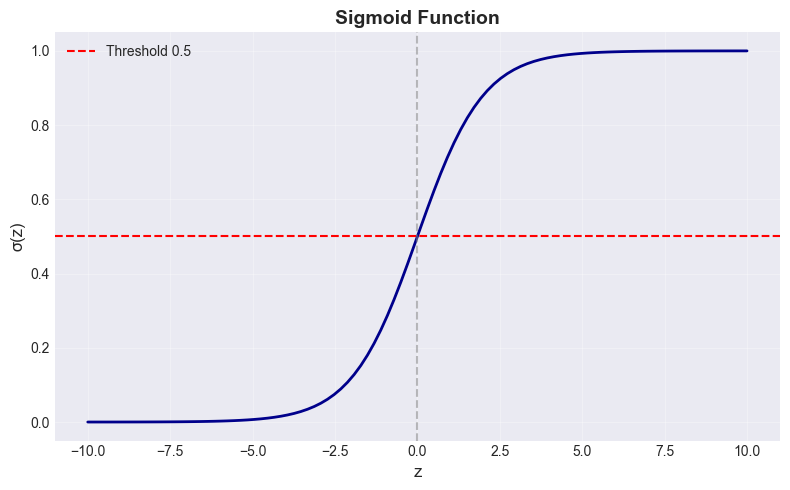

In [40]:

def sigmoid(z):
    """
    Compute the sigmoid function.
    
    Parameters:
    z: array of values
    
    Returns:
    Sigmoid function values
    """
    
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))


z_test = np.linspace(-10, 10, 100)
sigmoid_test = sigmoid(z_test)

plt.figure(figsize=(8, 5))
plt.plot(z_test, sigmoid_test, linewidth=2, color='darkblue')
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold 0.5')
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('z', fontsize=12)
plt.ylabel('σ(z)', fontsize=12)
plt.title('Sigmoid Function', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



In [41]:

def compute_cost(X, y, w, b):
    """
    Compute binary cross-entropy cost.
    
    Parameters:
    X: feature matrix (m, n)
    y: label vector (m,)
    w: weight vector (n,)
    b: bias (scalar)
    
    Returns:
    Cost (scalar)
    """
    m = X.shape[0]
    
   
    z = np.dot(X, w) + b
    h = sigmoid(z)
    
  
    h = np.clip(h, 1e-15, 1 - 1e-15)
    
    
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    
    return cost



In [42]:

def compute_gradients(X, y, w, b):
    """
    Compute gradients of the cost function.
    
    Parameters:
    X: feature matrix (m, n)
    y: label vector (m,)
    w: weight vector (n,)
    b: bias (scalar)
    
    Returns:
    dw: weight gradient (n,)
    db: bias gradient (scalar)
    """
    m = X.shape[0]
    
   
    z = np.dot(X, w) + b
    h = sigmoid(z)
    
  
    dw = (1/m) * np.dot(X.T, (h - y))
    db = (1/m) * np.sum(h - y)
    
    return dw, db



In [44]:

def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    """
    Perform gradient descent to optimize weights and bias.
    
    Parameters:
    X: feature matrix (m, n)
    y: label vector (m,)
    w: initial weight vector (n,)
    b: initial bias (scalar)
    learning_rate: learning rate (α)
    num_iterations: number of iterations
    
    Returns:
    w: optimized weight vector
    b: optimized bias
    costs: list of costs at each iteration
    """
    m = X.shape[0]
    costs = []
    
    for i in range(num_iterations):
       
        dw, db = compute_gradients(X, y, w, b)
        
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        
        if i % 100 == 0 or i == num_iterations - 1:
            cost = compute_cost(X, y, w, b)
            costs.append(cost)
            if i % 500 == 0:
                print(f"Iteration {i}: Cost = {cost:.4f}")
    
    return w, b, costs

print("Gradient descent function implemented successfully")


### Training

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nDistribution in training:")
print(pd.Series(y_train).value_counts())
print(f"\nDistribution in test:")
print(pd.Series(y_test).value_counts())

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Normalized features (first 5 rows of training set):")
print(X_train_scaled[:5])
print(f"\nMean of normalized features (should be ~0): {X_train_scaled.mean(axis=0)}")
print(f"Standard deviation (should be ~1): {X_train_scaled.std(axis=0)}")

In [ ]:

n_features = X_train_scaled.shape[1]
w = np.zeros(n_features)  
b = 0.0 

print(f"Initial weights shape: {w.shape}")
print(f"Initial bias: {b}")
print(f"Initial cost: {compute_cost(X_train_scaled, y_train, w, b):.4f}")

In [ ]:

learning_rate = 0.01
num_iterations = 2000

print("Training logistic regression model...")
print("="*50)
w, b, costs = gradient_descent(X_train_scaled, y_train, w, b, learning_rate, num_iterations)
print("="*50)
print(f"\nFinal cost: {costs[-1]:.4f}")
print(f"\nFinal weights: {w}")
print(f"Final bias: {b}")

In [ ]:

iterations_plotted = np.arange(0, num_iterations, 100)
if len(iterations_plotted) != len(costs):
    iterations_plotted = np.arange(0, num_iterations, num_iterations // len(costs))[:len(costs)]

plt.figure(figsize=(10, 6))
plt.plot(iterations_plotted, costs, linewidth=2, color='darkgreen', marker='o', markersize=4)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.title('Cost vs Iterations (Gradient Descent)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Initial cost: {costs[0]:.4f}")
print(f"Final cost: {costs[-1]:.4f}")
print(f"Cost reduction: {((costs[0] - costs[-1]) / costs[0] * 100):.2f}%")